# Data Analysis & Visualization: Palmer Archipelago Penguins

## Analysis Objectives

The purpose of this data analysis report is to visualize the relevant variables of penguin samples from the Palmer Archipelago. It aims to explore and analyze the relationships between factors such as species, sex, and island, and the penguins' physical attributes, including body mass, culmen (bill) length and depth, and flipper length.

## Introduction

The raw data `Penguins.csv` contains 334 penguin samples collected from three islands in Antarctica's Palmer Archipelago, along with related attribute data including species name, island, culmen length, culmen depth, flipper length, body mass, and sex.

The meaning of each column in `Penguins.csv` is as follows:
- **species**: The species of the penguin
- **island**: The island where the penguin was found
- **culmen_length_mm**: Length of the penguin's culmen (bill) in millimeters
- **culmen_depth_mm**: Depth of the penguin's culmen (bill) in millimeters
- **flipper_length_mm**: Length of the penguin's flipper in millimeters
- **body_mass_g**: Body mass of the penguin in grams
- **sex**: Sex of the penguin

Import the necessary libraries for data analysis and parse the data content from the raw data file `Penguins.csv` into a DataFrame using Pandas' `read_csv` function. Assign this DataFrame to the variable `original_data`.

In [828]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [829]:
original_data = pd.read_csv(r"C:\Users\小穆\Desktop\林粒粒python项目实战\林粒粒 项目82 可视化帕莫群岛企鹅数据\penguins.csv")
original_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Data Assessment and Cleaning

In this section, we will assess and clean the data contained within the `original_data` DataFrame created in the previous part.

The evaluation will focus on two main aspects: **structure** and **content**, which correspond to *tidyness* and *cleanliness* respectively.

*   **Structural issues** refer to non-compliance with the standards of "each variable as a column, each observation as a row, and each type of observational unit as a table."
*   **Content issues** include the presence of missing data, duplicate data, invalid data, and other anomalies.

To distinguish the cleaned data from the original, we create a new variable `cleaned_data` as a copy of the `original_data` DataFrame. All subsequent cleaning steps will be applied to `cleaned_data`.

### Data Tidyness

In [830]:
cleaned_data= original_data.copy()

In [831]:
cleaned_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


Based on the first 10 rows of data, the structure conforms to the principles of "each variable as a column, each observation as a row, and each type of observational unit as a table." Therefore, no structural issues are present.

### Data Cleanliness

Next, we use the `info` method to get a general overview of the data content.

In [832]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


From the output, we can see that the `cleaned_data` dataset contains 344 observations. The variables `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, and `body_mass_g` contain missing values, which will be assessed and handled in the subsequent steps.

Regarding data types, we know that `species` (penguin species), `sex` (penguin sex), and `island` (island where the penguin was found) are categorical data. Therefore, their data types can be converted to `Category`.

In [833]:
cleaned_data["species"] = cleaned_data["species"].astype("category")
cleaned_data["island"] = cleaned_data["island"].astype("category")
cleaned_data["sex"] = cleaned_data["sex"].astype("category")

#### Handling Missing Data

From the output of the `info` method, we can see that the variables `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`, and `sex` contain missing values in the `cleaned_data` DataFrame.

First, let's extract and examine the observations where these variables are missing.

In [834]:
cleaned_data.query("culmen_length_mm.isna()")


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [835]:
cleaned_data.query("culmen_depth_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [836]:
cleaned_data.query("flipper_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [837]:
cleaned_data.query("body_mass_g.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [838]:
cleaned_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


As shown above, the observations with indices 3 and 339 have missing values for all variables except `species` and `island`. These records cannot contribute valuable information for exploring factors related to penguin physical attributes. Therefore, these two rows can be directly deleted.

In [839]:
cleaned_data.drop(3,inplace=True)
cleaned_data.drop(339,inplace=True)

Observations missing the `sex` variable still contain other data and can provide value for the analysis. Since Pandas, Matplotlib, and Seaborn automatically handle (ignore) missing values during operations and visualizations, these rows can be retained.

#### Handling Duplicate Data

Based on the meaning and content of the data variables, duplicate values are permissible. Therefore, we do not need to check this dataset for duplicate entries.

#### Handling Inconsistent Data

Inconsistent data may exist within all categorical variables. We need to examine whether different values actually refer to the same entity.

In [840]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [841]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [842]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

From the output above, no inconsistent data is found in the `species` and `island` columns. However, the `sex` column contains a period (`.`) value, which does not represent a valid sex. We should replace this value with `NaN`.

In [843]:
cleaned_data["sex"]=cleaned_data["sex"].replace(".",np.nan)

C:\Users\小穆\AppData\Local\Temp\ipykernel_16284\663881643.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data["sex"]=cleaned_data["sex"].replace(".",np.nan)


Check if the period (`.`) values still exist.

In [844]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

The period (`.`) values have been replaced with `NaN`. Therefore, no inconsistent data remains in the `sex` column.

#### Handling Invalid or Erroneous Data

A quick overview of the numerical statistics can be obtained using the DataFrame's `describe` method.

In [845]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


在这里开始加上英文注释说明 

In [846]:
cleaned_data.to_csv("cleaned_data_1.csv",index=False)

In [847]:
pd.read_csv("cleaned_data_1.csv").head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN


In [848]:
sns.set_palette("pastel")

In [849]:
cleaned_data_1 = pd.read_csv(r"C:\Users\小穆\Desktop\林粒粒python项目实战\林粒粒 项目82 可视化帕莫群岛企鹅数据\cleaned_data_1.csv")
cleaned_data_1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [850]:
species_count = cleaned_data_1["species"].value_counts()
species_count

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

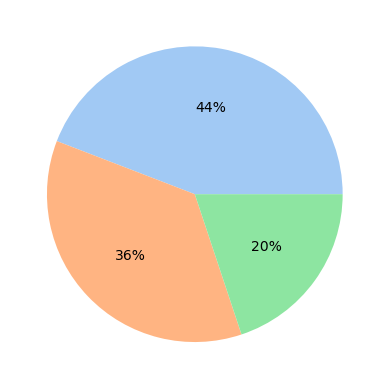

In [851]:
plt.pie(species_count,autopct = "%.0f%%")
plt.show()

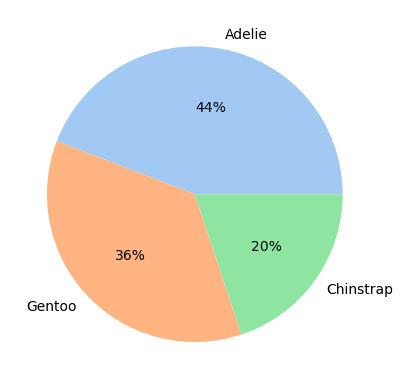

In [852]:
plt.pie(species_count,autopct = "%.0f%%",labels = species_count.index)
plt.show()

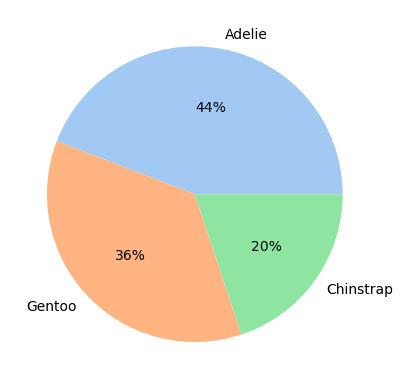

In [853]:
island_count = cleaned_data_1["island"].value_counts()
plt.pie(species_count,autopct = "%.0f%%",labels = species_count.index)
plt.show()

In [854]:
sex_count = cleaned_data_1["sex"].value_counts()
sex_count

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

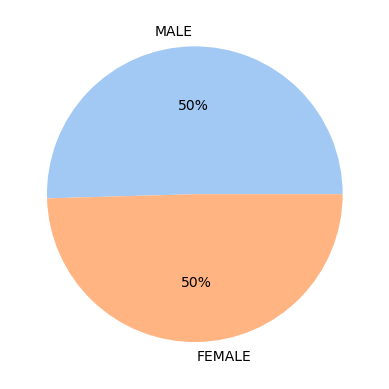

In [855]:
plt.pie(sex_count,autopct = "%.0f%%",labels = sex_count.index)
plt.show()

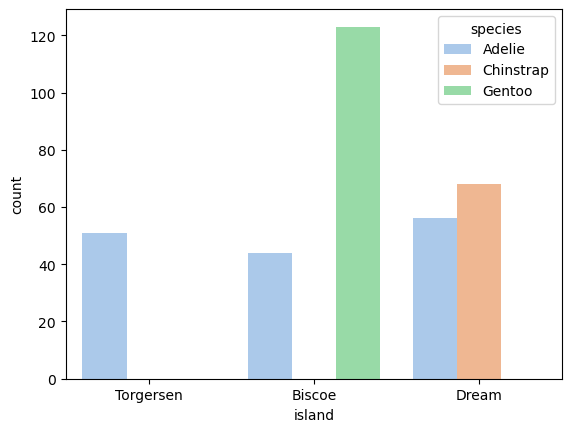

In [856]:
sns.countplot(cleaned_data_1,x="island",hue = "species")
plt.show()

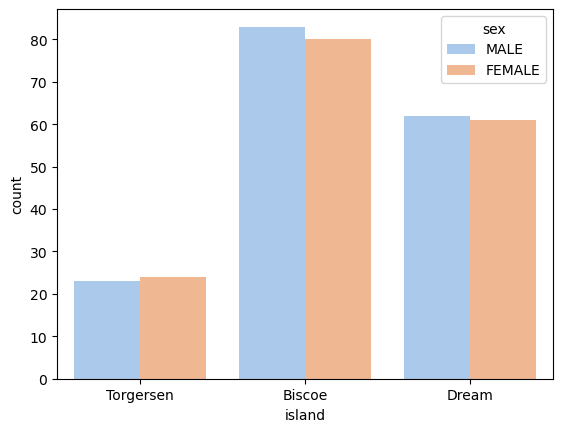

In [857]:
sns.countplot(cleaned_data_1,x="island",hue = "sex")
plt.show()

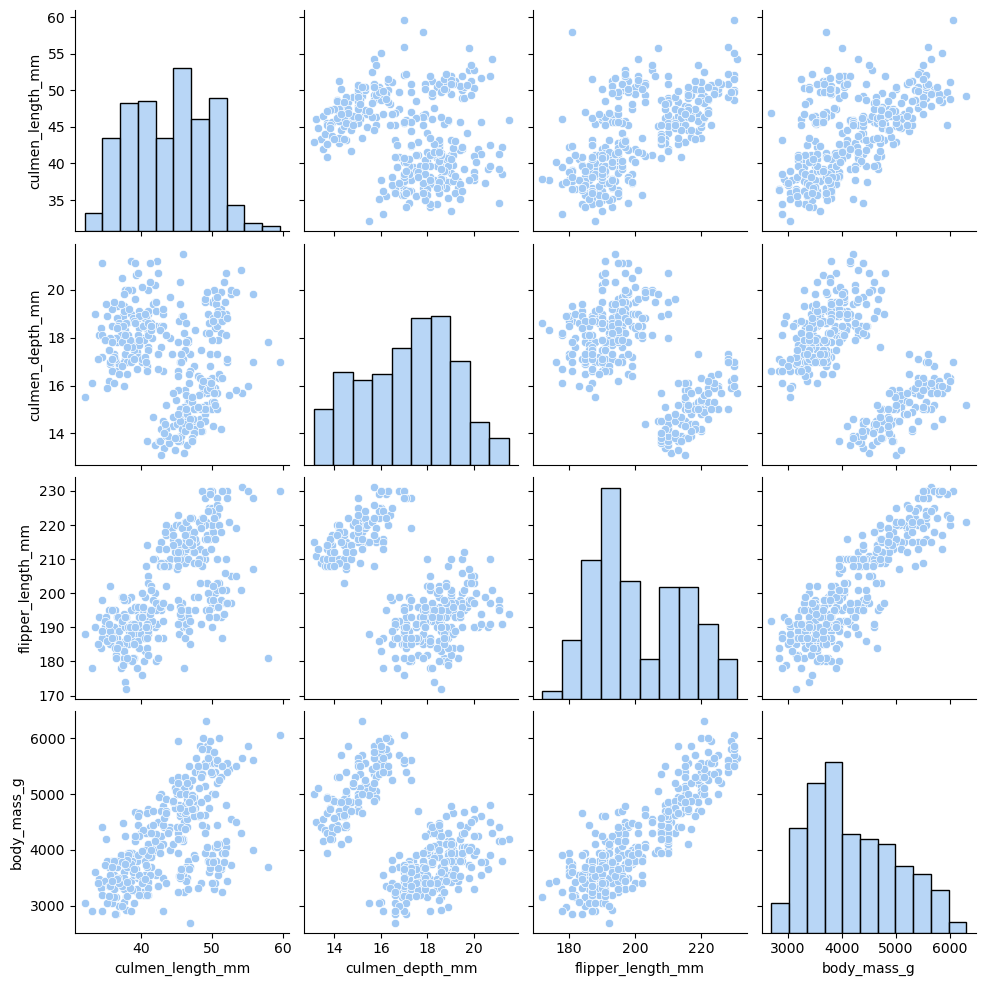

In [858]:
sns.pairplot(cleaned_data_1)
plt.show()

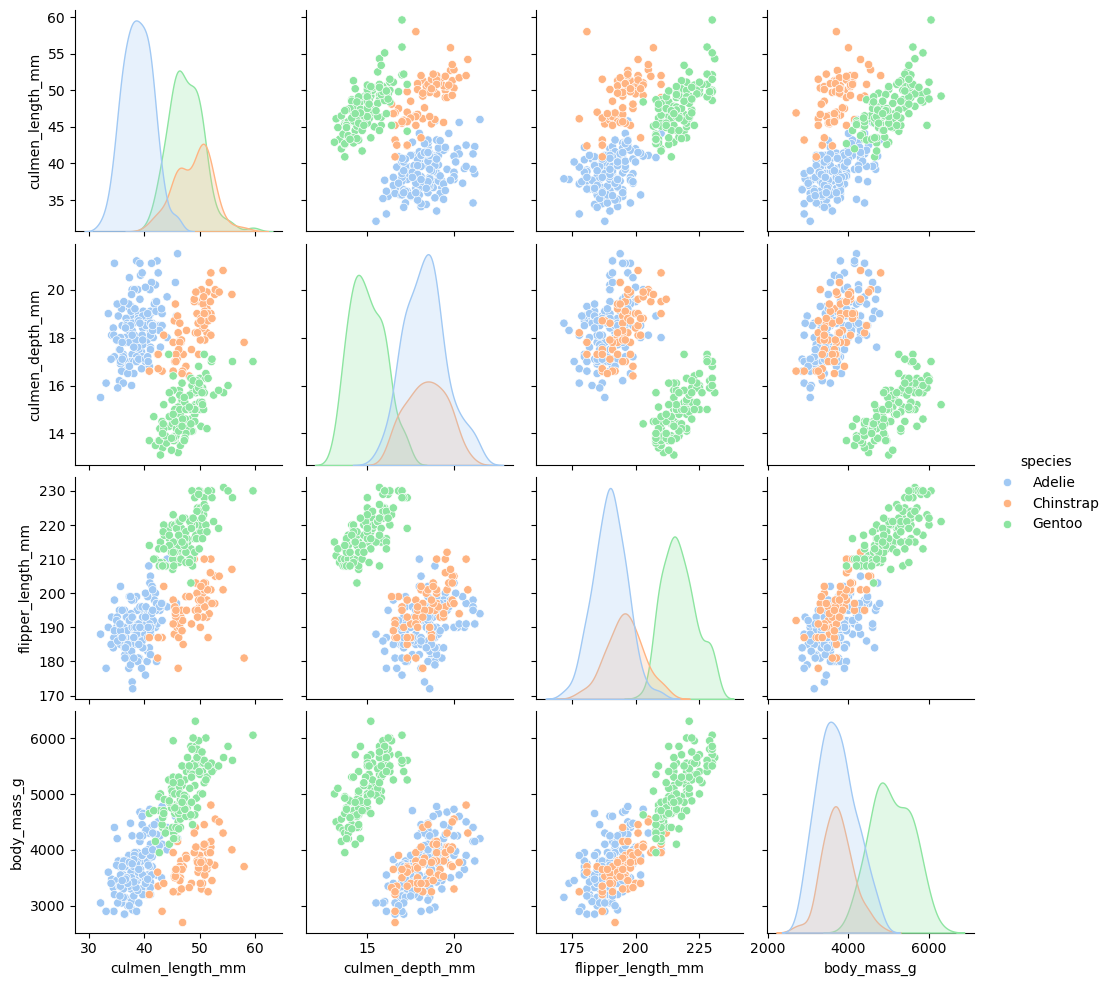

In [859]:
sns.pairplot(cleaned_data, hue='species')
plt.show()

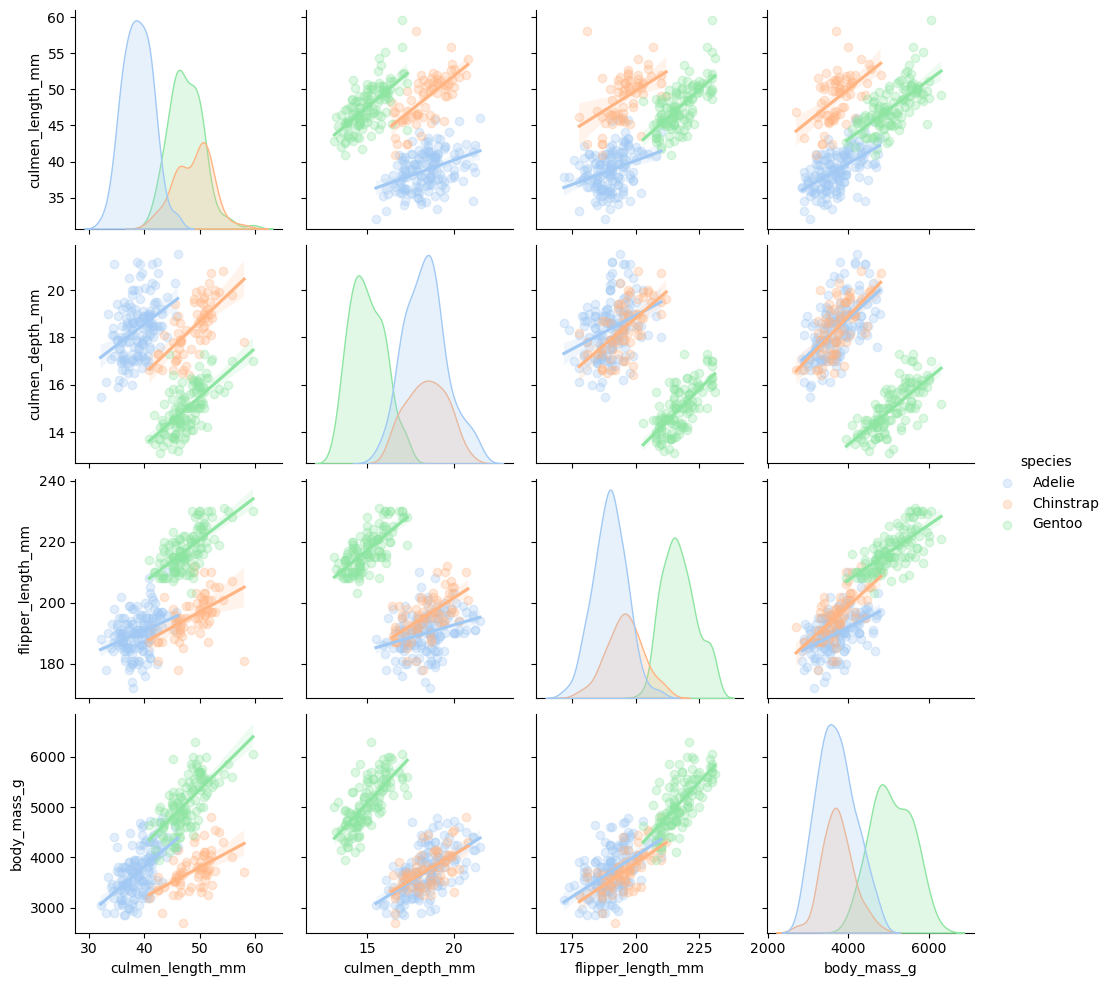

In [860]:
sns.pairplot(cleaned_data_1,hue = "species",kind = "reg",plot_kws={"scatter_kws":{"alpha":0.3}})
plt.show()

In [ ]:
sns.pairplot(cleaned_data_1,hue = "sex")

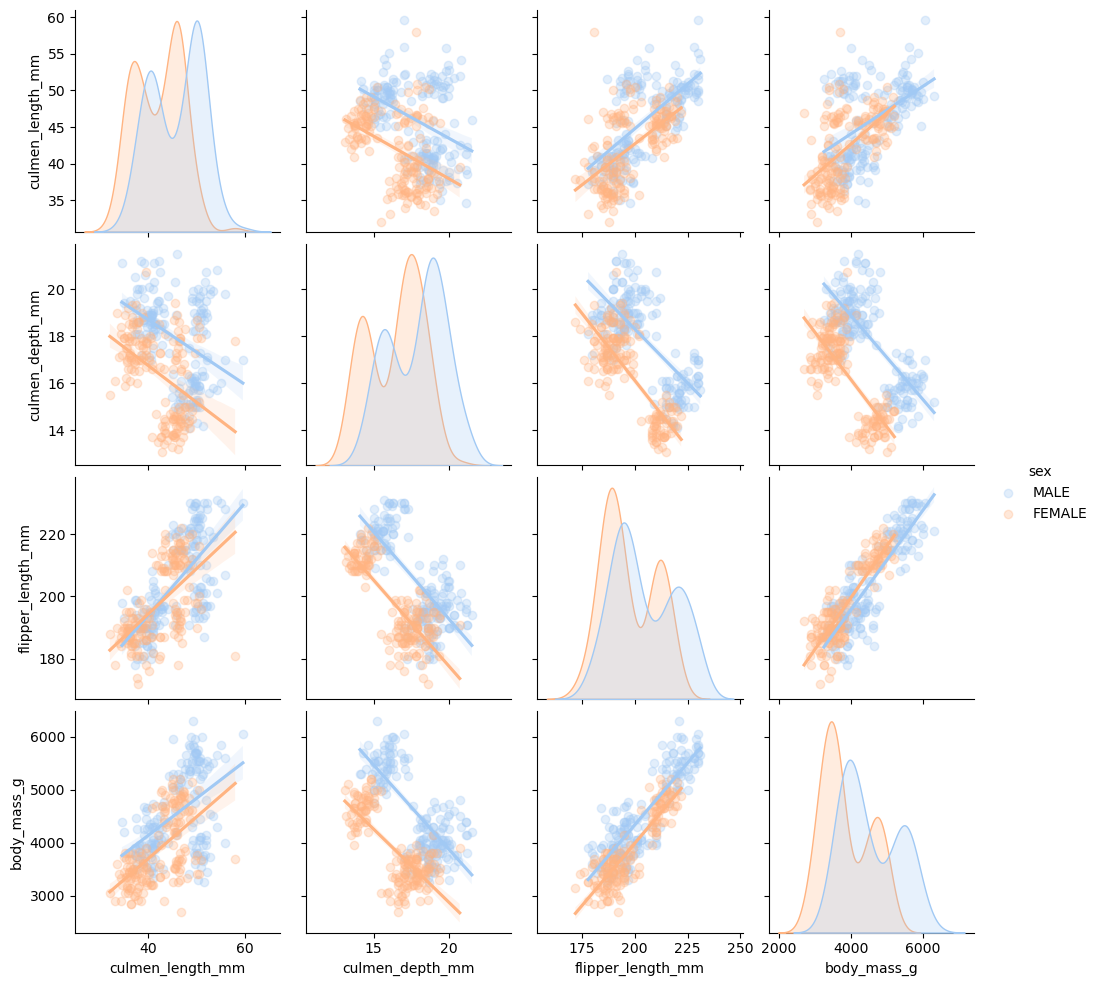

In [ ]:
sns.pairplot(cleaned_data_1,hue = "sex",kind = "reg",plot_kws = {"scatter_kws":{"alpha":0.3}})